In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [104]:
top1000 = pd.read_csv("data/1000_streamers_3.csv")
top1000

,streamer,href,media visualizaciones,horas stream,maximo historico,aumento followers,total followers,contenido principal,idioma,fecha creacion canal,subs actuales,maximo subs
0,Jynxzi,/jynxzi,97831,111.0,202569,708467,4872910,Tom Clancy's Rainbow Six Siege,English,2019-01-22,167453.0,179543.0
1,ibai,/ibai,78200,117.6,3442745,67288,15483385,Just Chatting,Spanish,2015-02-20,40880.0,136115.0
2,KaiCenat,/kaicenat,60974,110.5,348593,304962,9188458,Just Chatting,English,2021-01-27,82730.0,306621.0
3,auronplay,/auronplay,67954,83.6,602038,76889,16159377,Minecraft,Spanish,2019-09-03,24715.0,50796.0
4,caseoh_,/caseoh_,62387,97.3,110574,646878,3084552,NBA 2K23,English,2018-10-15,57841.0,58214.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,elyihi,/elyihi,2608,97.5,8060,879,69545,Sports,Spanish,2020-09-04,NaN,NaN
996,梓澪與村長,/s201111,3045,67.5,8465,12895,228305,Just Chatting,Cantonese,2020-12-14,NaN,NaN
997,twitchmedia28,/twitchmedia28,4360,13.3,5192,7,428,Fortnite,English,2016-05-20,NaN,NaN
998,Trebor,/trebor,3801,31.5,11202,24529,459715,Brawl Stars,Spanish,2020-05-29,NaN,NaN


Iniciamos el análisis revisando qué idioma es el más consumido dentro de Twitch.

In [16]:
ordenpaises = list(top1000["idioma"].value_counts().index)

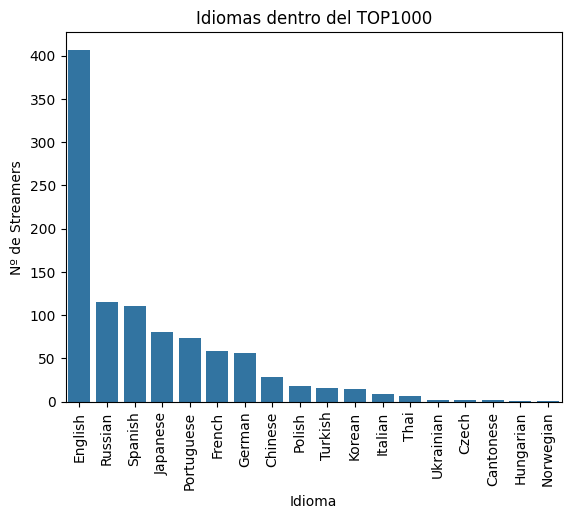

In [24]:
sns.countplot(x=top1000["idioma"], order=ordenpaises)
plt.title("Idiomas dentro del TOP1000")
plt.xlabel("Idioma")
plt.ylabel("Nº de Streamers")
plt.xticks(rotation=90);

In [ ]:
sns.countplot(x=top1000["idioma"], order=ordenpaises)
plt.title("Idiomas dentro del TOP1000")
plt.xlabel("Idioma")
plt.ylabel("Nº de Streamers")
plt.xticks(rotation=90);

<Axes: xlabel='idioma', ylabel='media visualizaciones'>

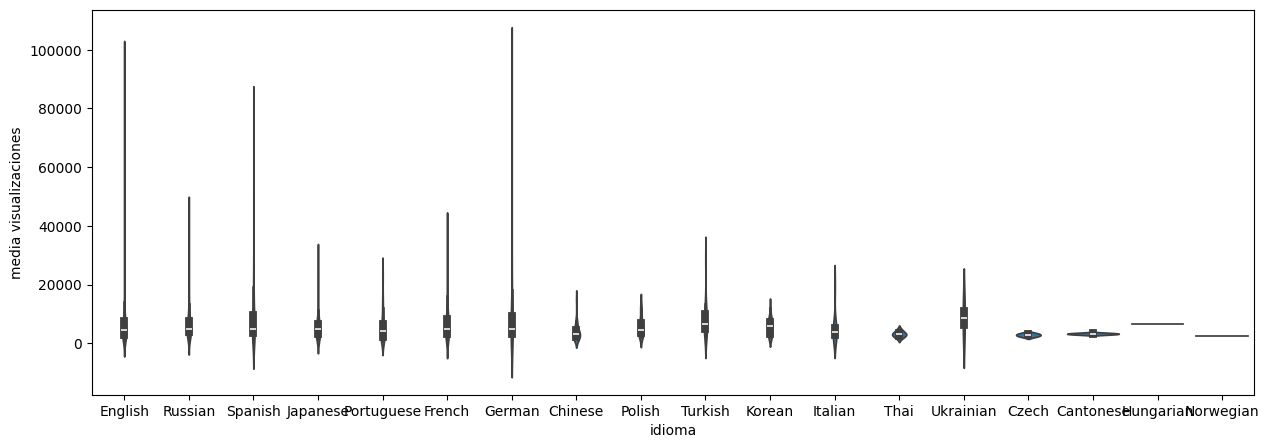

In [53]:
plt.figure(figsize=(15,5))
sns.violinplot(data=top1000, x="idioma", y= "media visualizaciones", order=ordenpaises)

<Axes: xlabel='idioma', ylabel='media visualizaciones'>

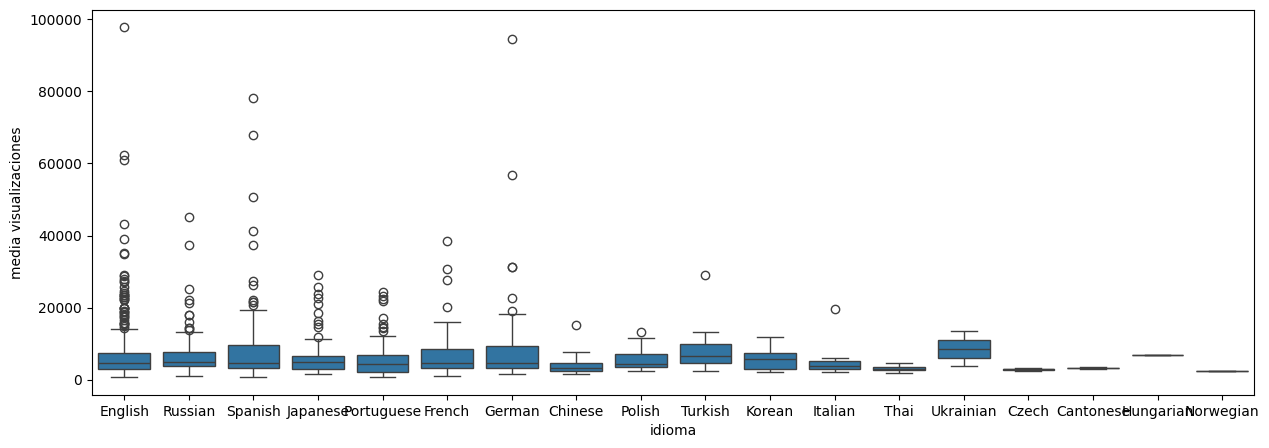

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(data=top1000, x="idioma", y= "media visualizaciones", order=ordenpaises)

<Axes: xlabel='idioma', ylabel='media visualizaciones'>

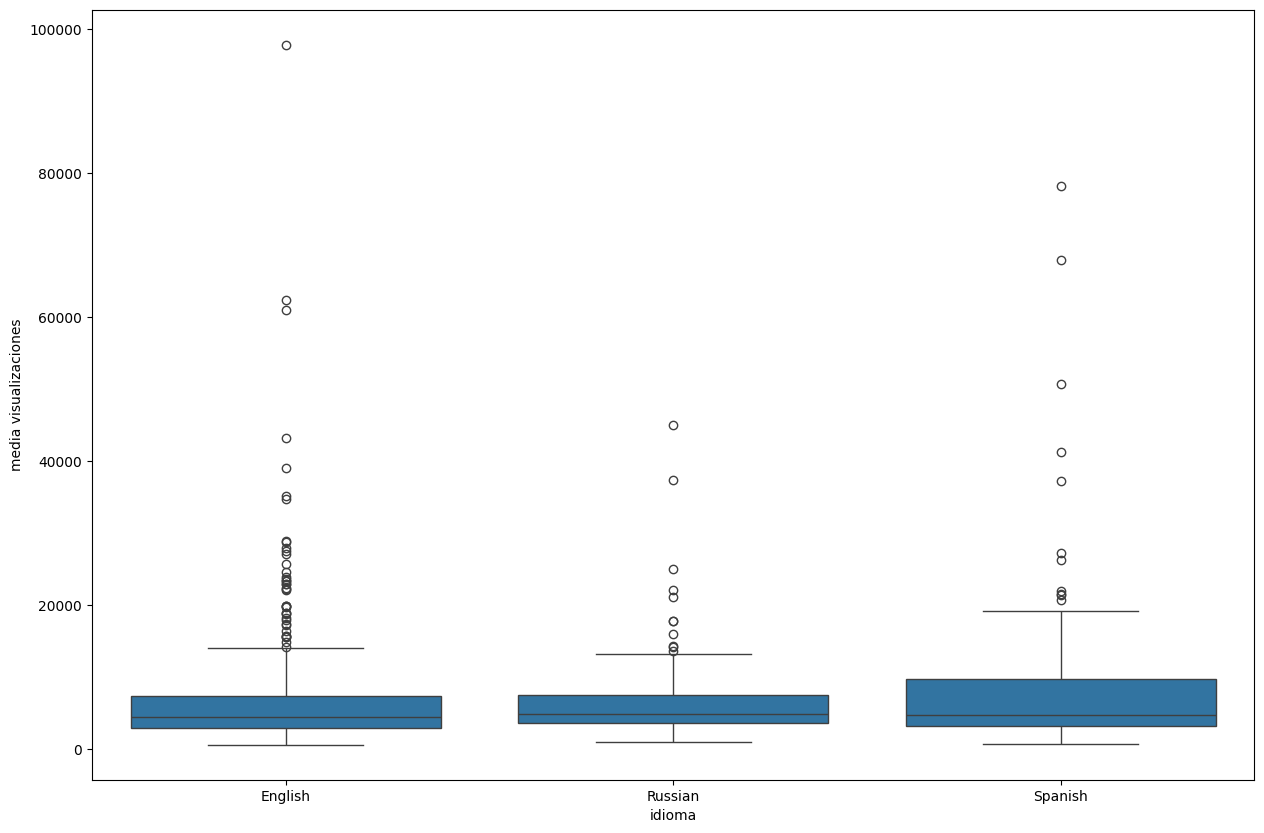

In [82]:
plt.figure(figsize=(15,10))
sns.boxplot(data=top1000, x="idioma", y= "media visualizaciones", order=ordenpaises[0:3])

<Axes: xlabel='idioma', ylabel='media visualizaciones'>

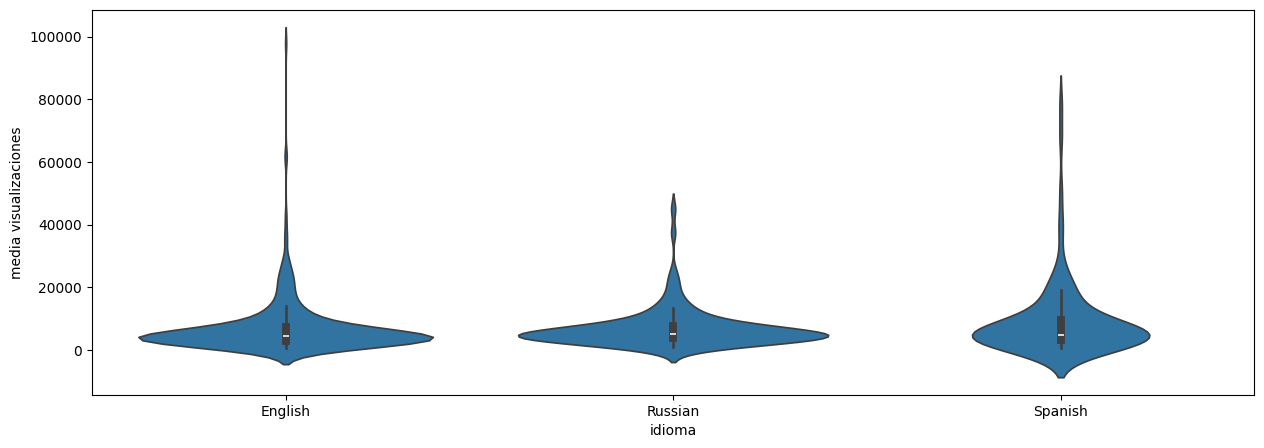

In [57]:
plt.figure(figsize=(15,5))
sns.violinplot(data=top1000, x="idioma", y= "media visualizaciones", order=ordenpaises[0:3])

In [ ]:
Aquí ya podemos observar cómo existe un

In [73]:
top1000_medias = top1000.groupby("idioma").aggregate({"media visualizaciones":"mean","maximo historico":"mean", "total followers":"mean"})

In [71]:
top1000.groupby("idioma")["media visualizaciones"].median().sort_values(ascending=False)

idioma
Ukrainian     8543.5
Hungarian     6700.0
Turkish       6569.5
Korean        5753.5
Japanese      4958.5
Russian       4952.0
French        4742.0
German        4730.0
Spanish       4723.0
English       4493.0
Polish        4416.0
Portuguese    4217.0
Italian       3739.0
Cantonese     3229.5
Chinese       3160.5
Thai          3000.0
Czech         2843.5
Norwegian     2487.0
Name: media visualizaciones, dtype: float64

In [80]:
top1000_medias.to_dict()

{'media visualizaciones': {'Cantonese': 3229.5,
  'Chinese': 3933.25,
  'Czech': 2843.5,
  'English': 7019.395577395578,
  'French': 7171.5084745762715,
  'German': 9604.625,
  'Hungarian': 6700.0,
  'Italian': 5559.222222222223,
  'Japanese': 6522.9875,
  'Korean': 5706.0,
  'Norwegian': 2487.0,
  'Polish': 5691.111111111111,
  'Portuguese': 5835.767123287671,
  'Russian': 6981.304347826087,
  'Spanish': 9244.709090909091,
  'Thai': 3118.4285714285716,
  'Turkish': 8282.9375,
  'Ukrainian': 8543.5},
 'maximo historico': {'Cantonese': 8930.5,
  'Chinese': 23553.571428571428,
  'Czech': 31141.0,
  'English': 69113.34398034398,
  'French': 115703.98305084746,
  'German': 62174.03571428572,
  'Hungarian': 48892.0,
  'Italian': 34990.666666666664,
  'Japanese': 35853.025,
  'Korean': 48238.28571428572,
  'Norwegian': 13976.0,
  'Polish': 45586.5,
  'Portuguese': 64543.931506849316,
  'Russian': 40020.33913043478,
  'Spanish': 157964.71818181817,
  'Thai': 28793.571428571428,
  'Turkish': 6

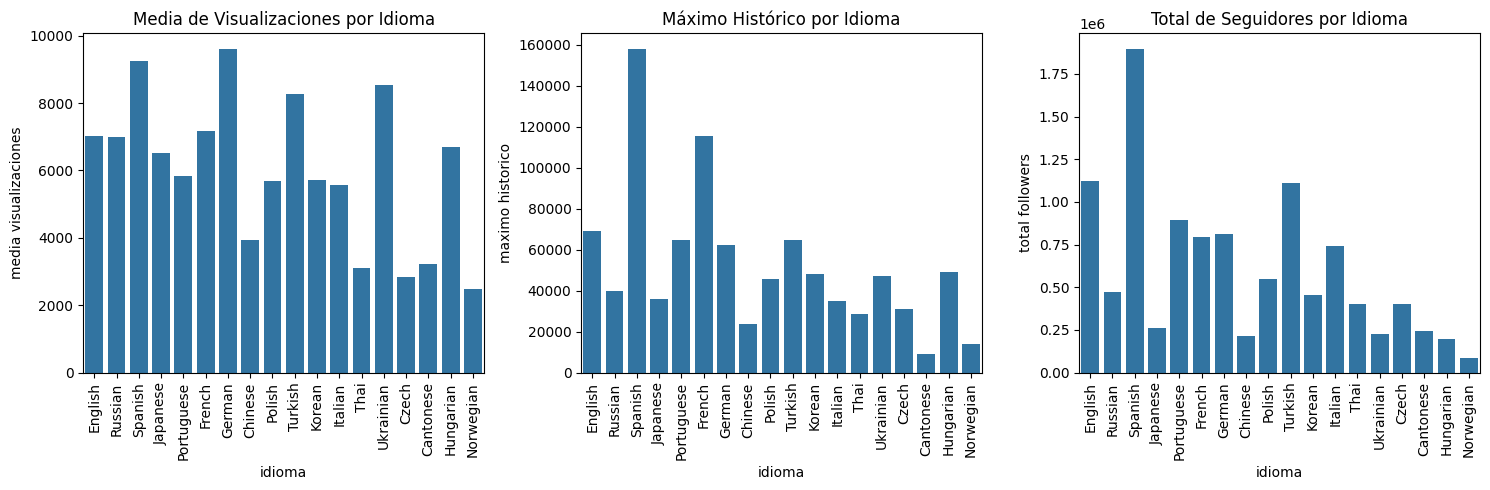

In [85]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=top1000_medias, x='idioma', y='media visualizaciones', order=ordenpaises)
plt.title('Media de Visualizaciones por Idioma')
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.barplot(data=top1000_medias, x='idioma', y='maximo historico', order=ordenpaises)
plt.title('Máximo Histórico por Idioma')
plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
sns.barplot(data=top1000_medias, x='idioma', y='total followers', order=ordenpaises)
plt.title('Total de Seguidores por Idioma')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

matriz de correlación

In [ ]:
media visualizaciones	horas stream	maximo historico	aumento followers	total followers	contenido principal	idioma	fecha creacion canal	subs actuales	maximo subs

In [86]:
correlacion = top1000[["media visualizaciones","horas stream", "maximo historico", "aumento followers", "total followers", "subs actuales","maximo subs"]].corr()

In [87]:
correlacion

,media visualizaciones,horas stream,maximo historico,aumento followers,total followers,subs actuales,maximo subs
media visualizaciones,1.000000,-0.196929,0.483343,0.578069,0.458630,0.613331,0.475491
horas stream,-0.196929,1.000000,-0.042983,-0.042257,-0.067669,0.090056,0.012032
maximo historico,0.483343,-0.042983,1.000000,0.152009,0.610745,0.243539,0.438784
aumento followers,0.578069,-0.042257,0.152009,1.000000,0.264358,0.660323,0.360471
total followers,0.458630,-0.067669,0.610745,0.264358,1.000000,0.295638,0.556775
subs actuales,0.613331,0.090056,0.243539,0.660323,0.295638,1.000000,0.640295
maximo subs,0.475491,0.012032,0.438784,0.360471,0.556775,0.640295,1.000000


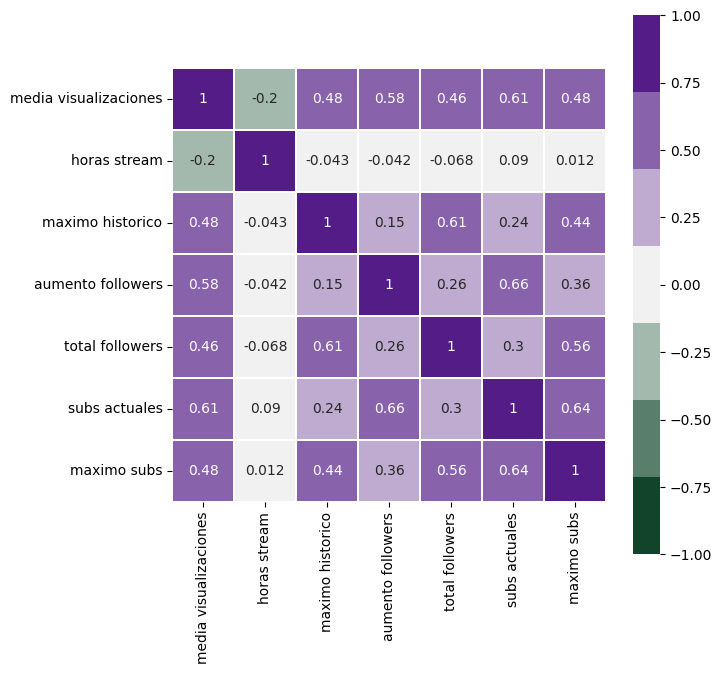

In [88]:
plt.figure(figsize=(7,7))
sns.heatmap(correlacion,
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True);

La mayor correlación está entre el aumento de followers del último mes y los subs actuales del streamer, seguido de los subs actuales con la media de visualizaciones y el total de follower con el máximo historico de visualizaciones simultáneas.

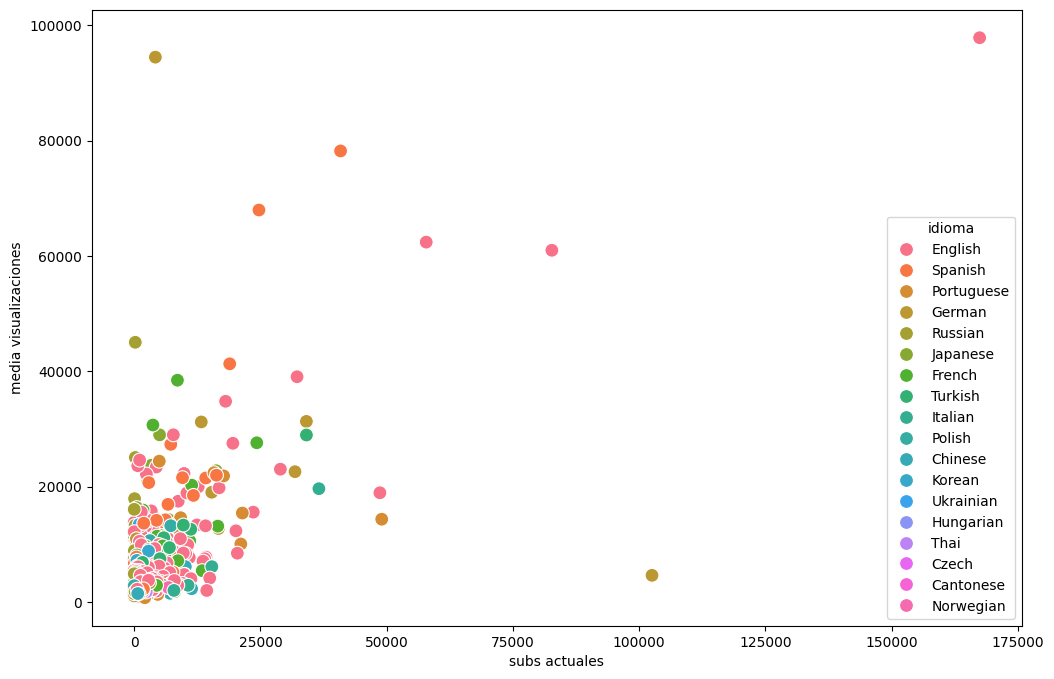

In [90]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=top1000['subs actuales'],
                y=top1000['media visualizaciones'],
                hue = top1000['idioma'],
               s=100)

(0.0, 7500.0)

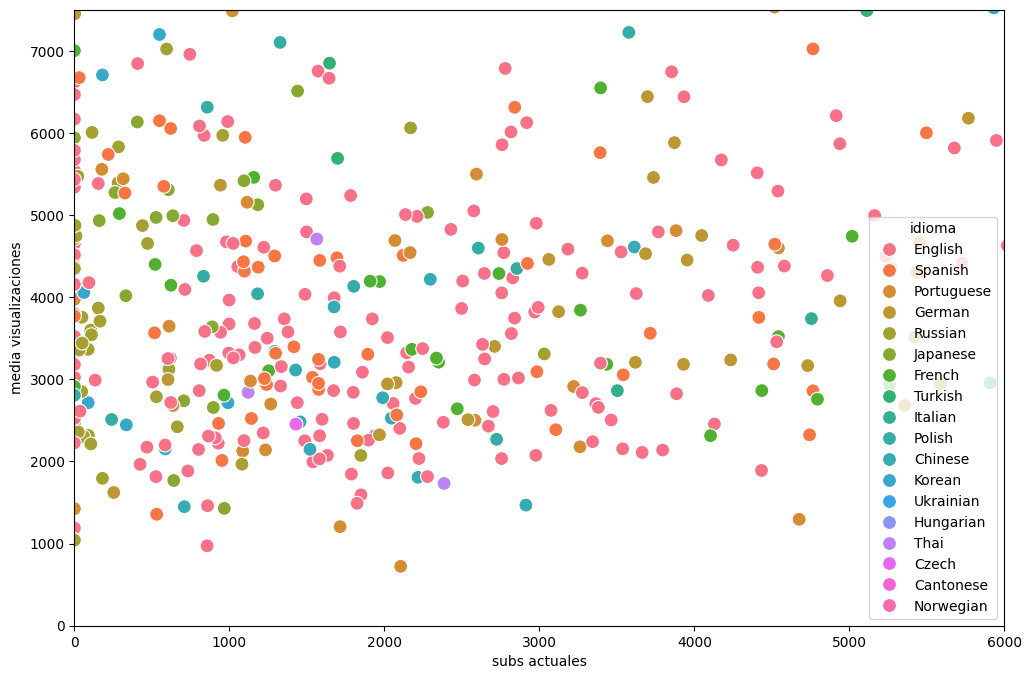

In [96]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=top1000['subs actuales'],
                y=top1000['media visualizaciones'],
                hue = top1000['idioma'],
               s=100)
plt.xlim(0,6000)
plt.ylim(0, 7500)